In [ ]:
 
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"


--2020-06-04 04:59:18--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.29.94
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.29.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  54.5MB/s    in 25s     

2020-06-04 04:59:43 (63.1 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



Loading train and test data
Data loaded
Tokenizing and padding data
Tokenizing and padding complete
Printing tweets converted to numeric vectors
Creating the LSTM model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 128)           256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 34, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 651,011
Trainable params: 651,011
Non-trainable params: 0
_________________________________________________________________
Training the LSTM model


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7708 samples, validate on 1928 samples
Epoch 1/10
7708/7708 [==============================] - 20s 3ms/step - loss: 0.5972 - accuracy: 0.6866 - val_loss: 0.5509 - val_accuracy: 0.7030
Epoch 2/10
7708/7708 [==============================] - 19s 3ms/step - loss: 0.5141 - accuracy: 0.7352 - val_loss: 0.6454 - val_accuracy: 0.6741
Epoch 3/10
7708/7708 [==============================] - 20s 3ms/step - loss: 0.4494 - accuracy: 0.7841 - val_loss: 0.5005 - val_accuracy: 0.7538
Epoch 4/10
7708/7708 [==============================] - 20s 3ms/step - loss: 0.4069 - accuracy: 0.8143 - val_loss: 0.4750 - val_accuracy: 0.7784
Epoch 5/10
7708/7708 [==============================] - 20s 3ms/step - loss: 0.3690 - accuracy: 0.8312 - val_loss: 0.4516 - val_accuracy: 0.7823
Epoch 6/10
7708/7708 [==============================] - 20s 3ms/step - loss: 0.3478 - accuracy: 0.8449 - val_loss: 0.4422 - val_accuracy: 0.7872
Epoch 7/10
7708/7708 [==============================] - 20s 3ms/step - loss: 0.331

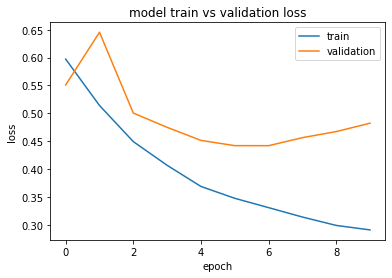

In [ ]:
import os
import tensorflow
import numpy as np
os.environ['KERAS_BACKEND'] = 'tensorflow'

from sklearn.model_selection import train_test_split 
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import pandas as pd
from termcolor import colored
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array

print(colored("Loading train and test data", "blue"))
df = pd.read_csv(r'coronatweets.csv')
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1) 
print(colored("Data loaded", "blue"))

print(colored("Tokenizing and padding data", "blue"))
tokenizer = Tokenizer(num_words = 2000, split = ' ')
tokenizer.fit_on_texts(train_data['full_text'].astype(str).values)
train_tweets = tokenizer.texts_to_sequences(train_data['full_text'].astype(str).values)
max_len = max([len(i) for i in train_tweets])
train_tweets = pad_sequences(train_tweets, maxlen = max_len)
test_tweets = tokenizer.texts_to_sequences(test_data['full_text'].astype(str).values)
test_tweets = pad_sequences(test_tweets, maxlen = max_len)
print(colored("Tokenizing and padding complete", "blue"))
print(colored("Printing tweets converted to numeric vectors","blue"))


print(colored("Creating the LSTM model", "blue"))
model = Sequential()
model.add(Embedding(2000, 128, input_length = train_tweets.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout = 0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
model.summary()

print(colored("Training the LSTM model", "green"))
history = model.fit(train_tweets, pd.get_dummies(train_data['sent_score']).values, epochs = 10, batch_size = 256,validation_split=0.2)
print(colored(history, "green"))

print(colored("Testing the LSTM model", "green"))
score, accuracy = model.evaluate(test_tweets, pd.get_dummies(test_data['sent_score']).values, batch_size = 256)
print("Test accuracy: {}".format(accuracy))

from matplotlib import pyplot
from numpy import array

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


 


In [ ]:
print(accuracy)

0.7902311682701111
